In [1]:
# import module
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
  
# assign and open image
url = 'https://media.geeksforgeeks.org/wp-content/cdn-uploads/20210401173418/Webp-compressed.jpg'
response = requests.get(url, stream=True)
  
with open('image.png', 'wb') as f:
    f.write(response.content)
  
img = cv2.imread('image.png')

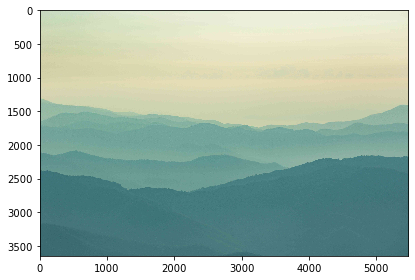

In [9]:
from skimage import io
 
img = io.imread('image.png')
io.imshow(img)

In [10]:
# Converting the image into gray scale for faster
# computation.
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image  

array([[207, 207, 207, ..., 229, 229, 229],
       [207, 207, 207, ..., 229, 229, 229],
       [207, 207, 207, ..., 229, 229, 229],
       ...,
       [100, 100, 100, ..., 103, 103, 103],
       [100, 100, 100, ..., 103, 103, 103],
       [100, 100, 100, ..., 103, 103, 103]], dtype=uint8)

In [11]:
# Calculating the SVD
u, s, v = np.linalg.svd(gray_image, full_matrices=False)
  
# inspect shapes of the matrices
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')

u.shape:(3648, 3648),s.shape:(3648,),v.shape:(3648, 5472)


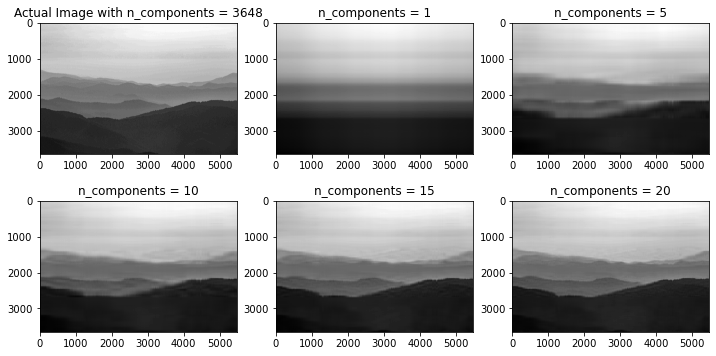

In [12]:
# plot images with different number of components
comps = [3648, 1, 5, 10, 15, 20]
plt.figure(figsize=(12, 6))
  
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]
      
    if(i == 0):
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}')
      
    else:
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'n_components = {comps[i]}')